A retail company Ã¢Â€ÂœABC Private LimitedÃ¢Â€Â wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories.
They have shared purchase summary of various customers for selected high volume products from last month. 
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [40]:
## Reading train and test data
train=pd.read_csv("~/Downloads/black_train.csv")
test=pd.read_csv("~/Downloads/black_test.csv")

In [41]:
## Head od train data
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [42]:
## Head od test data
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [43]:
## Shape of train and test
train.shape,test.shape

((550068, 12), (233599, 11))

In [44]:
## Checking for missing values in train data
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [45]:
## Info of  train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [46]:
## Columns of train data
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [47]:
## Combining train and test data set
data=pd.concat([train,test],ignore_index=False,sort=False)

In [48]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [49]:
## NaN represents that there are no subcategory for Product_Category_1 then in place of NaN value we can impute 0 which will
## represent that there are no sub category present over there.

In [50]:
## Summary Statistics of data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,783667.0,NaN,NaN,NaN,1003028.995753,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Product_ID,783667,3677,P00265242,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,783667,2,M,590031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,783667,7,26-35,313015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,783667.0,NaN,NaN,NaN,8.0793,6.522206,0.0,2.0,7.0,14.0,20.0
City_Category,783667,3,B,329739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,783667,5,1,276425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,783667.0,NaN,NaN,NaN,0.409777,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,NaN,NaN,NaN,5.366196,3.87816,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,NaN,NaN,NaN,9.844506,5.089093,2.0,5.0,9.0,15.0,18.0


## Treating Missing Values

In [12]:
## Checking Missing values in combined data
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [13]:
## Imputting missing values
data['Product_Category_2'].fillna(0,inplace=True)
data['Product_Category_3'].fillna(0,inplace=True)

In [14]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [15]:
data['Product_Category_2'].value_counts()

0.0     245982
8.0      91317
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [16]:
data['Product_Category_3'].value_counts()

0.0     545809
16.0     46469
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

### Relative Frequency of Userid and Productid

In [17]:
#data.drop(['User_ID','Product_ID'],axis=1,inplace=True)
map_userid=data['User_ID'].value_counts()/len(data['User_ID'])
data['User_ID']=data['User_ID'].map(map_userid)

In [18]:
map_productid=data['Product_ID'].value_counts()/len(data['Product_ID'])
data['Product_ID']=data['Product_ID'].map(map_productid)

In [19]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


## Univariate Analysis

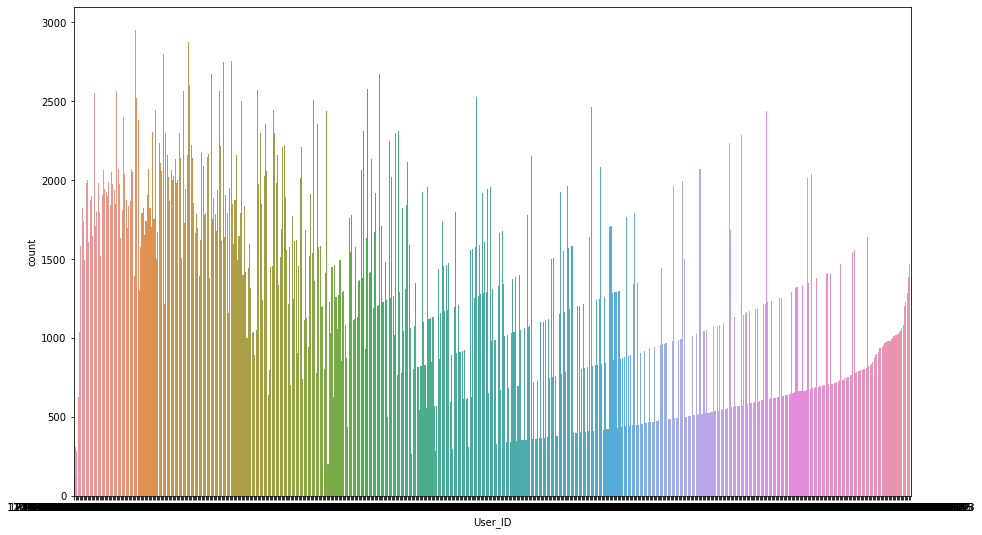

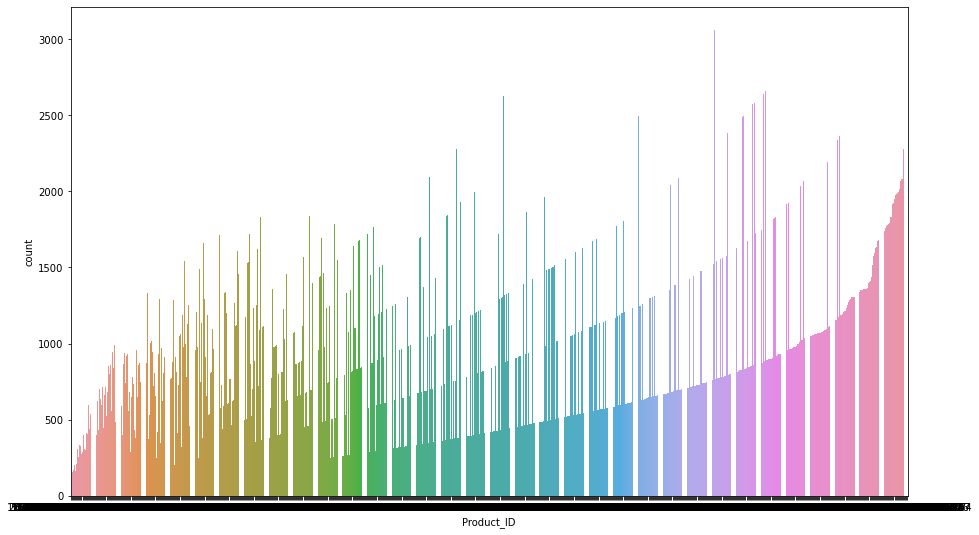

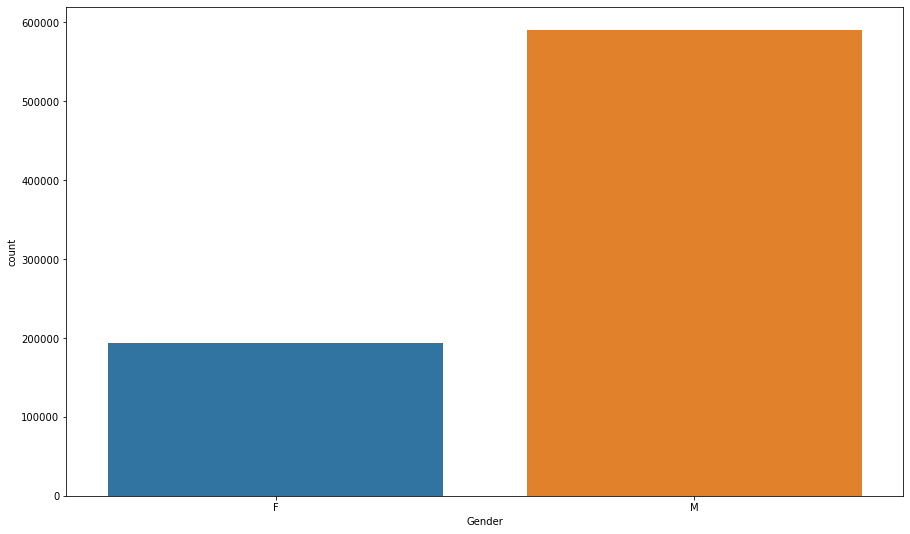

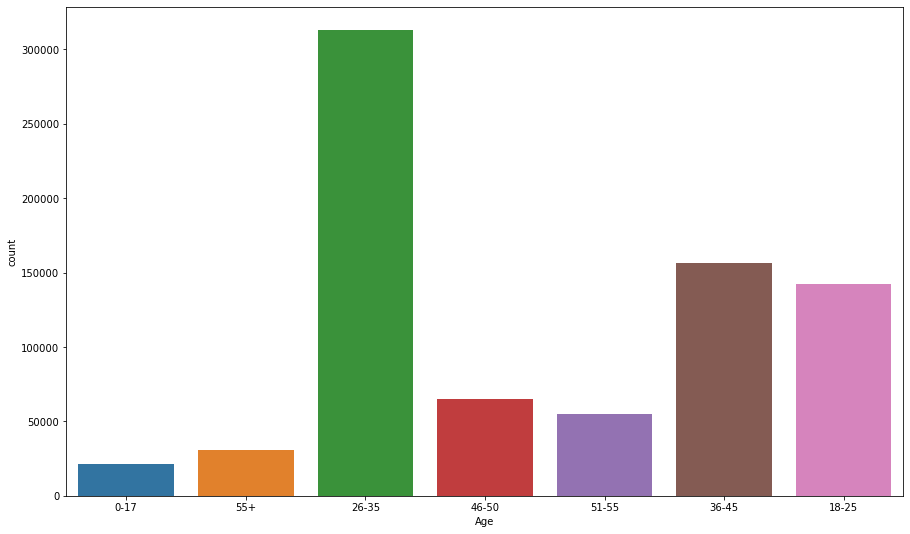

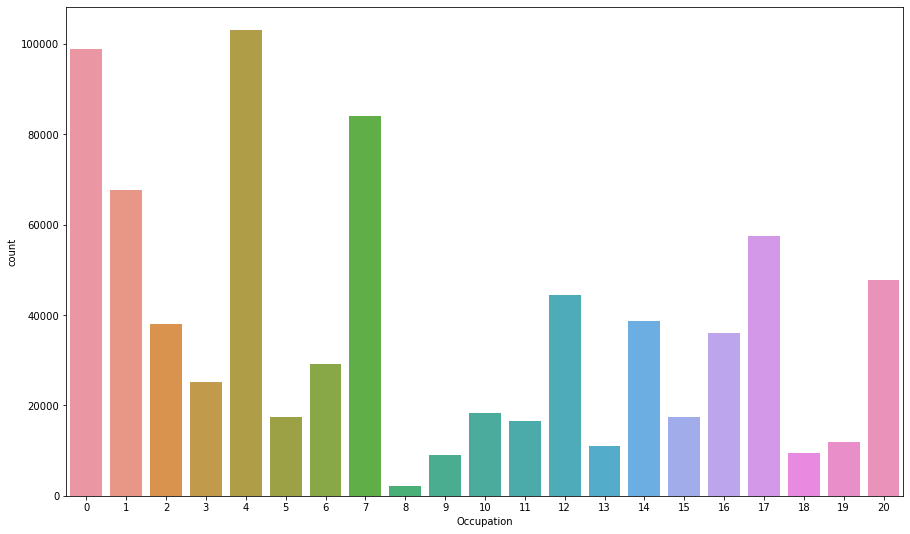

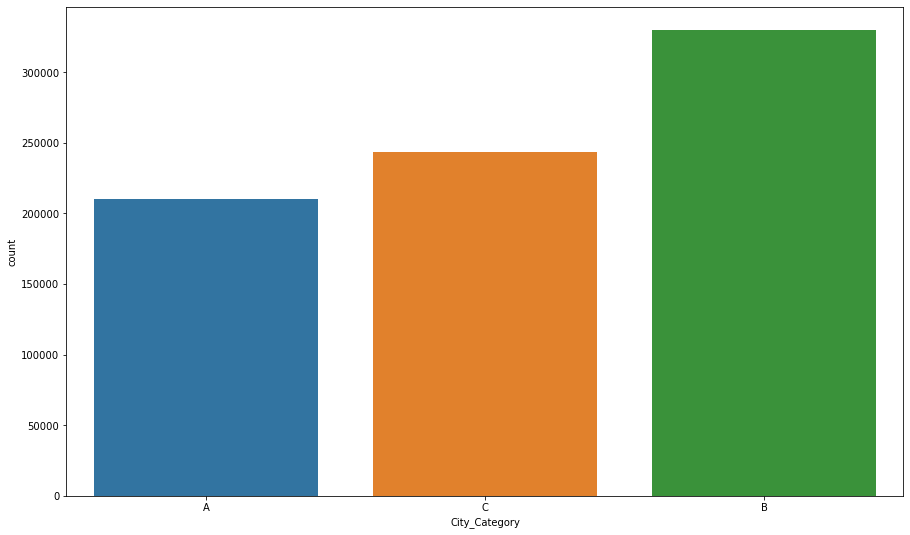

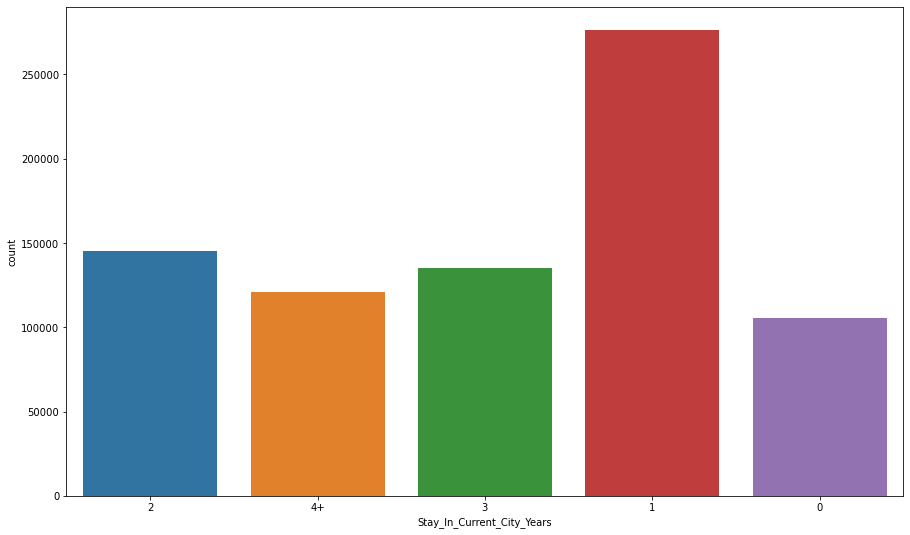

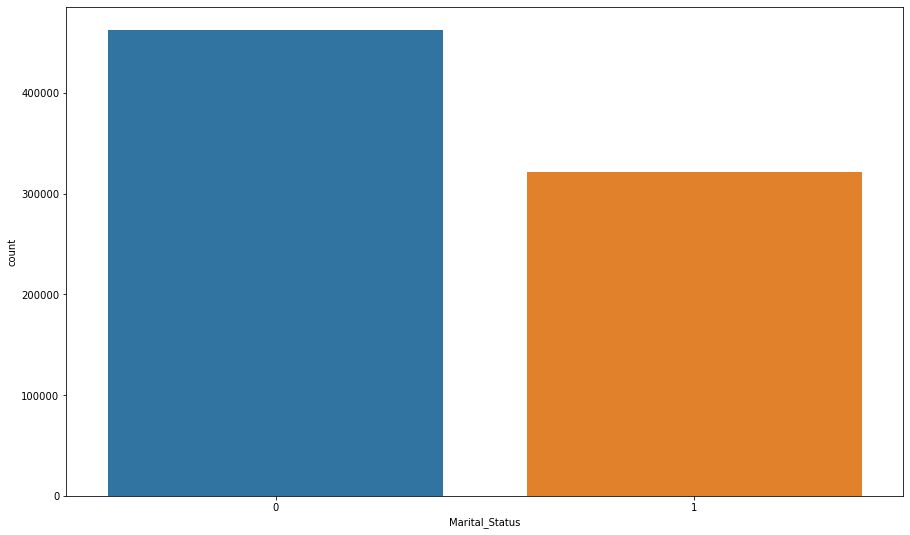

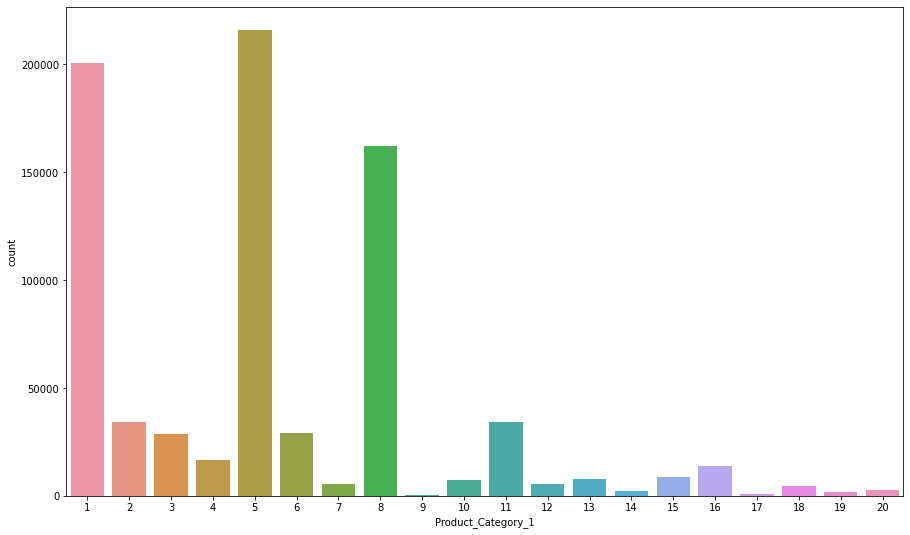

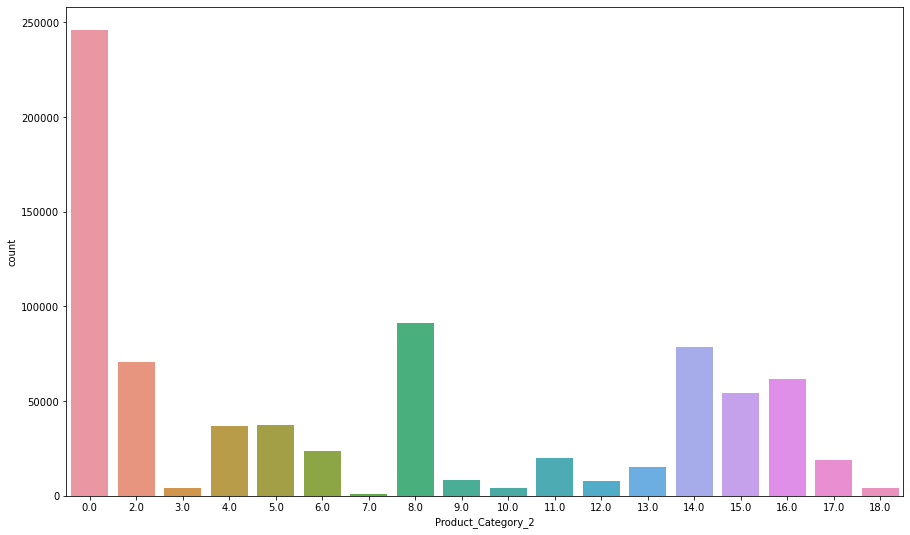

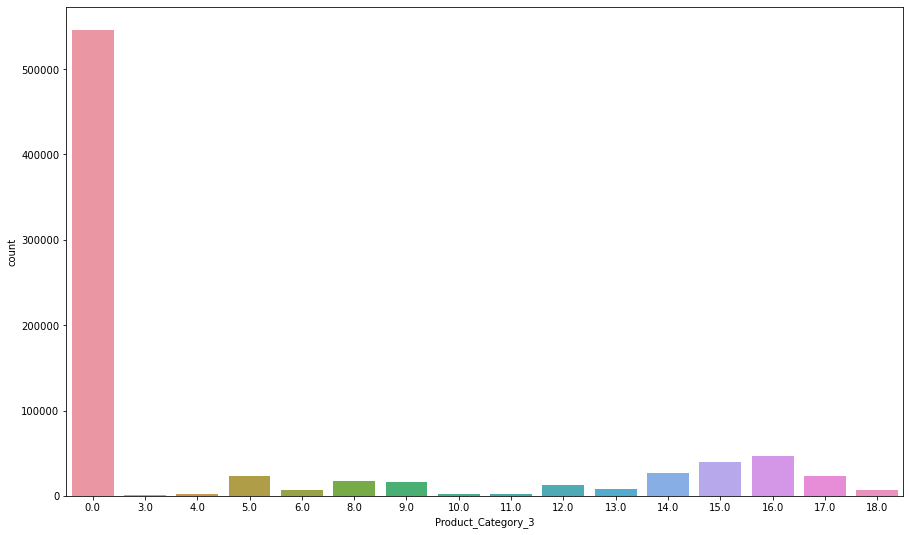

In [20]:
plt.rcParams['figure.figsize']=[15,9]
for i in data.columns:
    if i!='Purchase':
        sns.countplot(data[i])
        plt.show()

## Inferences

*Males are more as compared to Females in the data which means that most of the purchase is done Males. 

*The people in the age group 26-35 are the highest followed by 36-45 and the least are in the age group 0-17.

*The count of occuaption increases from 0 to 7 and after that it falls from 8 to 20.

*The Category B followed by Category C then Category A in descending order of purchase.

*Most of them have stayed for min 1 year.

*The people which are unmarried are more as compared to people which are unmarried.


## Bivariate Analysis

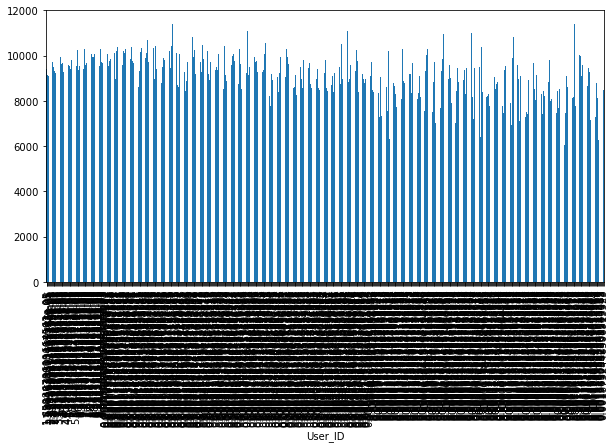

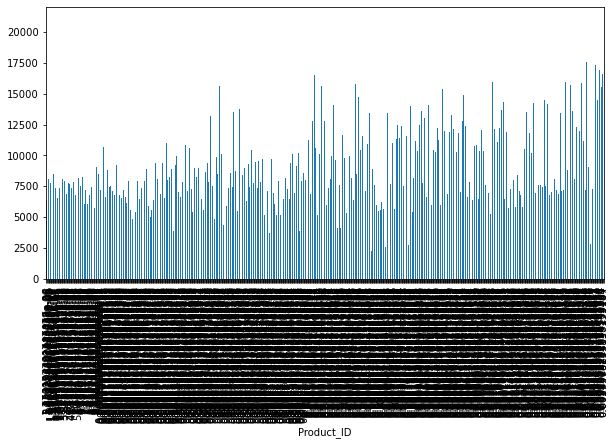

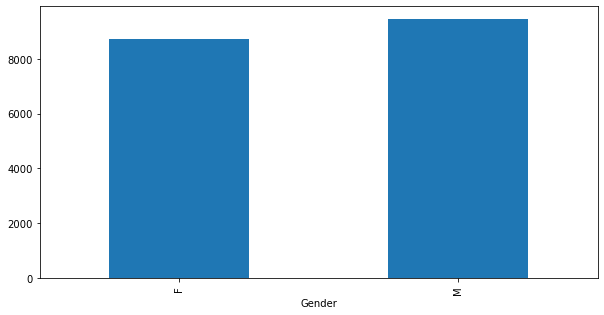

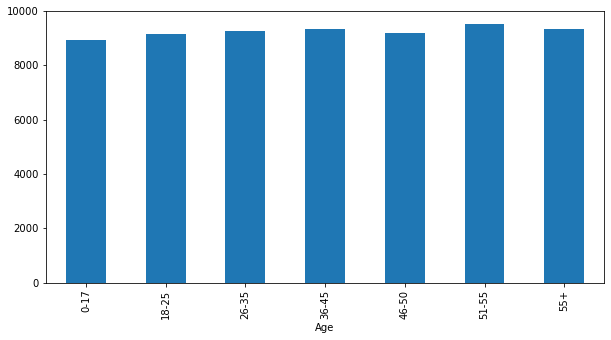

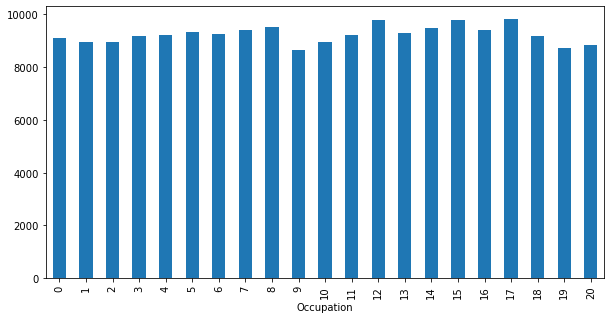

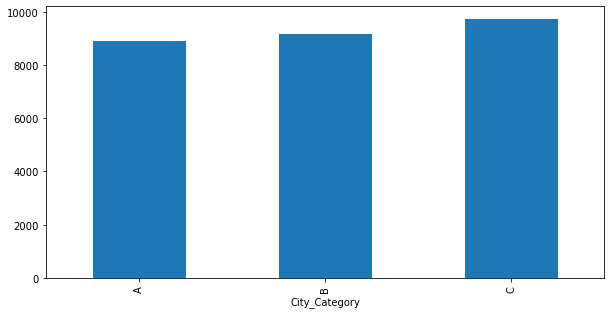

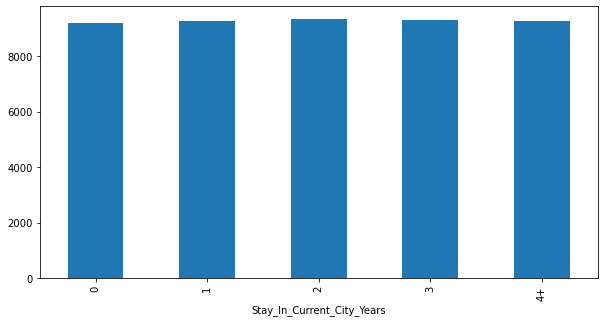

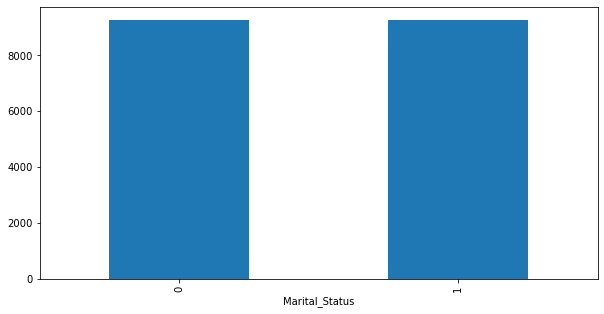

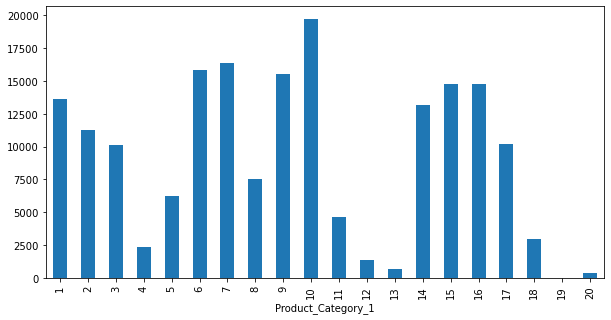

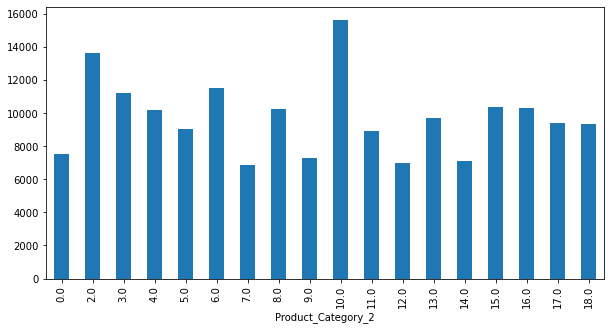

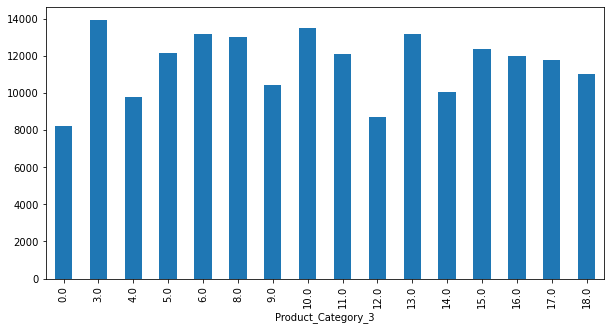

<Figure size 720x360 with 0 Axes>

In [22]:
for i in data.columns:
    plt.figure(figsize=(10,5))
    if i!='Purchase':
        data.groupby(by=[i])['Purchase'].mean().plot(kind='bar')
        plt.show()

* Males are more purchasing as compared to females.
* In city category C highest products are purchased followed by B then category A.
* The product 10 is purchased the highest in product category 1.
* The product 10 is purchased the highest in product category 2.
* The product 3 is purchased the highest in product category 3.

## Categorical Treatment

In [23]:
## Head of combined data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [24]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

In [25]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,0,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,0,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,0,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,1,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [26]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [27]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [28]:
## Label encoding of age variable
data['Age']=le.fit_transform(data['Age']) ## Label Encoding Age column due to ordinality in Age column

In [29]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,0,0,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,0,0,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,0,0,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,1,6,16,C,4+,0,8,0.0,0.0,7969.0
5,0.000052,0.001101,1,2,15,A,3,0,1,2.0,0.0,15227.0
6,0.000019,0.002636,1,4,7,B,2,1,1,8.0,17.0,19215.0
7,0.000019,0.001054,1,4,7,B,2,1,1,15.0,0.0,15854.0
8,0.000019,0.001664,1,4,7,B,2,1,1,16.0,0.0,15686.0
9,0.000193,0.001453,1,2,20,A,1,1,8,0.0,0.0,7871.0


In [30]:
## Label encoding of Stay In Current City Years
data['Stay_In_Current_City_Years']=le.fit_transform(data['Stay_In_Current_City_Years'])

In [31]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000060,0.000439,0,0,10,A,2,0,3,0.0,0.0,8370.0
1,0.000060,0.001078,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0.000060,0.000191,0,0,10,A,2,0,12,0.0,0.0,1422.0
3,0.000060,0.000633,0,0,10,A,2,0,12,14.0,0.0,1057.0
4,0.000137,0.000361,1,6,16,C,4,0,8,0.0,0.0,7969.0


In [32]:
data=pd.get_dummies(data,drop_first=True)

In [33]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0.000060,0.000439,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,0.000060,0.001078,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0.000060,0.000191,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,0.000060,0.000633,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,0.000137,0.000361,1,6,16,4,0,8,0.0,0.0,7969.0,0,1


In [34]:
## Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  float64
 1   Product_ID                  783667 non-null  float64
 2   Gender                      783667 non-null  uint8  
 3   Age                         783667 non-null  int32  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  City_Category_B             783667 non-null  uint8  
 12  City_Category_C             783667 non-null  uint8  
dtypes: float64(5),

In [35]:
train_f=data[~(data['Purchase'].isnull())]

In [36]:
test_f=data[data['Purchase'].isnull()]

In [37]:
train_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0.000060,0.000439,0,0,10,2,0,3,0.0,0.0,8370.0,0,0
1,0.000060,0.001078,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0.000060,0.000191,0,0,10,2,0,12,0.0,0.0,1422.0,0,0
3,0.000060,0.000633,0,0,10,2,0,12,14.0,0.0,1057.0,0,0
4,0.000137,0.000361,1,6,16,4,0,8,0.0,0.0,7969.0,0,1


In [38]:
train_f['Purchase']=train_f['Purchase'].astype('int')

In [39]:
test_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0.000019,0.001701,1,4,7,2,1,1,11.0,0.0,NaN,1,0
1,0.000108,0.000473,1,2,17,0,0,3,5.0,0.0,NaN,0,1
2,0.000413,0.000277,0,3,1,4,1,5,14.0,0.0,NaN,1,0
3,0.000413,0.000029,0,3,1,4,1,4,9.0,0.0,NaN,1,0
4,0.000140,0.000997,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [40]:
## Dropping the Purchase variable from test final
del test_f['Purchase']

In [41]:
test_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C
0,0.000019,0.001701,1,4,7,2,1,1,11.0,0.0,1,0
1,0.000108,0.000473,1,2,17,0,0,3,5.0,0.0,0,1
2,0.000413,0.000277,0,3,1,4,1,5,14.0,0.0,1,0
3,0.000413,0.000029,0,3,1,4,1,4,9.0,0.0,1,0
4,0.000140,0.000997,0,2,1,1,0,4,5.0,12.0,0,1


## Train Test Split

In [42]:
## Splitting of train and test and defining x,y
x=train_f.drop(columns=['Purchase'])
y=train_f['Purchase']

In [43]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [44]:
X=sm.add_constant(x)
X.head()

,const,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C
0,1.0,0.000060,0.000439,0,0,10,2,0,3,0.0,0.0,0,0
1,1.0,0.000060,0.001078,0,0,10,2,0,1,6.0,14.0,0,0
2,1.0,0.000060,0.000191,0,0,10,2,0,12,0.0,0.0,0,0
3,1.0,0.000060,0.000633,0,0,10,2,0,12,14.0,0.0,0,0
4,1.0,0.000137,0.000361,1,6,16,4,0,8,0.0,0.0,0,1


In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((440054, 13), (110014, 13), (440054,), (110014,))

## Model Building

In [47]:
model=sm.OLS(y_train,x_train).fit()

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     9139.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:36:40   Log-Likelihood:            -4.3255e+06
No. Observations:              440054   AIC:                         8.651e+06
Df Residuals:                  440041   BIC:                         8.651e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [50]:
pred_lr=lr.fit(x,y).predict(test_f)

In [51]:
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':pred_lr})

submission.to_csv("lr.csv",index=False)  ## 4507.258

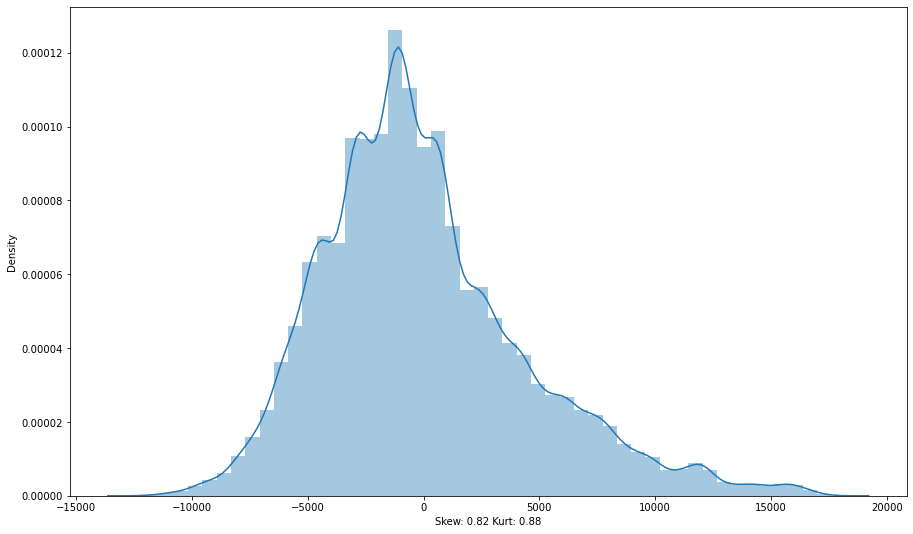

In [52]:
sns.distplot(model.resid)#Model is not linear,linear model fails as residuals are not normal
plt.xlabel('Skew: %.2f Kurt: %.2f'%(model.resid.skew(),model.resid.kurt()))
plt.show()

In [53]:
model.resid.skew()

0.8188509193712378

## Checking for Multicollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]

In [56]:
pd.DataFrame({'VIF':vif[:]},index=x_train.columns).sort_values(by=['VIF'],ascending=False)

,VIF
const,23.553619
City_Category_C,2.071263
City_Category_B,1.574682
User_ID,1.448297
Product_Category_3,1.229047
Product_Category_1,1.205720
Product_ID,1.153860
Age,1.136892
Marital_Status,1.108732
Gender,1.024818


## Let us try Models with other Algorithms

## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [59]:
pred_dt=dt.fit(x,y).predict(test_f)

In [60]:
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':pred_dt})

submission.to_csv("dt.csv",index=False)   ## 3772.993

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [63]:
pred_rf=rf.fit(x,y).predict(test_f)

In [64]:
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':pred_rf})

submission.to_csv("rf.csv",index=False)   ## 2732.142

In [ ]:
#Saving a model using pickle

## Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [67]:
pred_gb=gb.fit(x,y).predict(test_f)

In [68]:
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':pred_gb})

submission.to_csv("gb.csv",index=False)    ## 2853.999

## XG Boost

In [70]:
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [71]:
pred_xgb=xgb.fit(x,y).predict(test_f)

In [72]:
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':pred_xgb})

submission.to_csv("xgb.csv",index=False)  ## 2629.527

## Bagging Regressor

In [73]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor()

In [74]:
pred_bag=bag.fit(x,y).predict(test_f)

In [75]:
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':pred_bag})

submission.to_csv("bag.csv",index=False)    ## 2849.206

## Tuning XGBRegressor

In [83]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
from sklearn.model_selection import GridSearchCV
params = [{"learning_rate":[0.1, 0.2, 0.01, 0.3, 0.5],
          "max_depth":[4, 5, 6, 8]}]

xgb=XGBRegressor()

In [84]:
grid=GridSearchCV(estimator=xgb,param_grid=params,cv=5)

## Fitting the grid search model
grid.fit(x,y)

## Printing best parameters
print(grid.best_params_)

{'learning_rate': 0.5, 'max_depth': 8}


## Tuned Model

In [85]:
xgb=XGBRegressor(learning_rate=0.5, max_depth=8)
pred_xgb=xgb.fit(x,y).predict(test_f)

In [86]:
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':pred_xgb})

submission.to_csv("xgb_tuned.csv",index=False)    ## 2552.178

In [87]:
df = pd.DataFrame(data = xgb.feature_importances_, 
                  columns = ["Feat_imp"], index = xgb.feature_names_in_)

<AxesSubplot:>

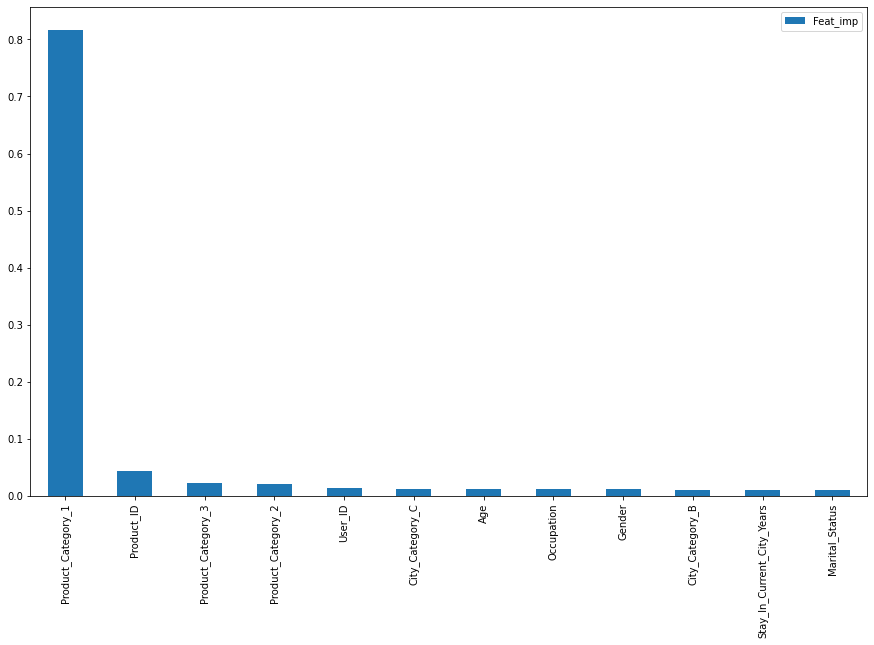

In [88]:
df.sort_values(by = "Feat_imp", ascending = False,kind = "quicksort").plot(kind = "bar")

## Cross Validaton Model - XGB

In [90]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

xgb= XGBRegressor(learning_rate = 0.5, max_depth = 8)
pred_model = pd.DataFrame()

n = 10
for i in range(n):
    folds = next(kfold.split(x)) # Splitting the data in even groups...
    xtrain = x.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = xgb.fit(xtrain, ytrain).predict(test_f)  

In [91]:
xgb_cv=pred_model.mean(axis=1)
submission=pd.DataFrame({'User_ID':test.User_ID,'Product_ID':test.Product_ID,
                        'Purchase':xgb_cv})

submission.to_csv("xgb_cv.csv",index=False)    ## 2508.439